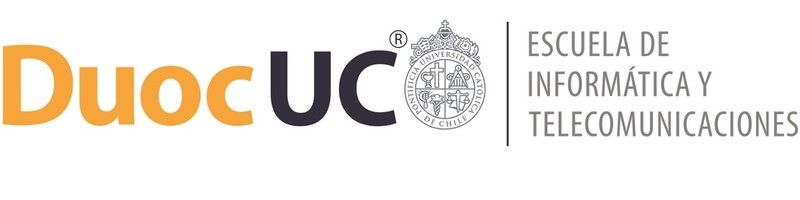

# Metodologia CRISP en Notebook
- Nombrede los integrantes del grupo: Nicolas Ceron, Manuel Hidalgo y Benjamin Barraza
- evaluacion # X
- fecha entrega

## Fase 1: Business Understanding

---



## 1.1: Comprension del Negocio

StarCraft II es un juego de estrategia en tiempo real (RTS) desarrollado por Blizzard Entertainment. Lanzado en 2010, es la secuela del icónico StarCraft original. El juego se desarrolla en un futuro distante, donde tres facciones principales —los terran, zerg y protoss— compiten por el control del sector Koprulu.

En este contexto, el desempeño del jugador se mide mediante un sistema de ligas, que van desde Bronce (nivel básico) hasta GrandMaster y Profesional (nivel experto). Estas ligas se determinan en base al rendimiento individual durante las partidas.

- ......
- ......
- ......


<!-- 11 atributos descriptivos.
  1 etiqueta de [1: enfermedad cardíaca, 0: normal] -->

En este contexto, se presentan los siguientes datos:
- GameID: Unique ID for each game
- LeagueIndex: 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues
- .....
- .....


## 1.2: Objetivo del proyecto

El objetivo de este análisis es comprender el comportamiento de los jugadores en distintos niveles de habilidad y cómo ciertas variables influyen en su desempeño. Se busca construir una base analítica que permita:

Identificar patrones en el comportamiento de juego según el nivel del jugador.

Determinar qué factores tienen mayor influencia en alcanzar ligas más altas.

Posiblemente, construir un modelo predictivo para estimar el nivel de un jugador a partir de sus estadísticas.

## 1.3: Datos Disponibles

GameID: Identificador único de cada partida.

LeagueIndex: Nivel de liga del jugador, donde:

1 = Bronce, 2 = Plata, 3 = Oro, 4 = Diamante, 5 = Maestro, 6 = Gran Maestro, 7 = Profesional (dependiendo del contexto).

Age: Edad del jugador.

HoursPerWeek: Horas promedio que el jugador juega por semana.

TotalHours: Horas totales jugadas por el jugador.

APM (Actions Per Minute): Acciones por minuto realizadas por el jugador (medida de velocidad de juego).

SelectByHotkeys: Proporción de unidades seleccionadas usando atajos de teclado.

AssignToHotkeys: Proporción de veces que el jugador asigna grupos de control a teclas rápidas.

MinimapAttacks: Frecuencia con que el jugador da órdenes de ataque desde el minimapa.

MinimapRightClicks: Cantidad de clics derechos en el minimapa (generalmente para mover unidades).

NumberOfPACs: Número total de agrupaciones de acciones (PAC = "Perception Action Cycle").

GapBetweenPACs: Tiempo promedio entre agrupaciones de acciones.

ActionLatency: Tiempo promedio de reacción entre estímulo y acción.

ActionsInPAC: Número promedio de acciones dentro de cada agrupación.

TotalMapExplored: Proporción del mapa total que el jugador ha explorado durante la partida.

WorkersMade: Número total de unidades recolectoras creadas (por ejemplo, drones o SCVs).

UniqueUnitsMade: Número de tipos distintos de unidades creadas.

ComplexUnitsMade: Número de unidades complejas (costosas o con habilidades especiales) creadas.

ComplexAbilityUsed: Frecuencia de uso de habilidades complejas (como escudos o hechizos).

MaxTimeStamp: Tiempo total en segundos de la duración de la partida.

## 1.4: Criterios de Éxito del Negocio

Identificar al menos tres insights clave sobre el comportamiento de los jugadores que puedan ser usados en estrategias de mejora o aprendizaje.

Si se desarrolla un modelo predictivo, que tenga una precisión mínima del 80% al predecir la liga del jugador.

Entregar visualizaciones y conclusiones claras que faciliten la toma de decisiones o el diseño de estrategias en el entorno competitivo del juego.

Aportar valor didáctico o estratégico a jugadores, entrenadores o desarrolladores que analicen el rendimiento en StarCraft II.







----------------------------------------------------------------------------------------

## Fase 2: Data Understanding

In [1]:
#código análisis estadísticos de cada columna, medidas de tendencia central, de segmentación, decribe(), tipos de datos,
#distribucion datos categoricos, distribucion datos numéricos, correlación entre columna,
#detección dupplicados, nulos, aoutliers

 - Explicación de observación (hallazgos). Todo respaldado con gráficos y elementos de análsis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ruta del archivo CSV
file_path = "starcraft_duoc.csv"

# Cargar el archivo 
df = pd.read_csv(file_path, sep=';',encoding='utf-8')

In [16]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936


### Dimensiones del dataset

In [19]:
print(f"Filas: {df.shape[0]} \nColumnas: {df.shape[1]}")

Filas: 3395 
Columnas: 20


- El dataset contiene **3395 filas** y **20 columnas**.
- Las columnas incluyen variables numéricas (edad, horas de juego, APM, etc.) y categóricas (como **LeagueIndex**).

### Tipos de datos y valores nulos

In [5]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   object 
 6   SelectByHotkeys     3395 non-null   object 
 7   AssignToHotkeys     3395 non-null   object 
 8   MinimapAttacks      3395 non-null   object 
 9   MinimapRightClicks  3395 non-null   object 
 10  NumberOfPACs        3395 non-null   float64
 11  GapBetweenPACs      3395 non-null   object 
 12  ActionLatency       3395 non-null   object 
 13  ActionsInPAC        3395 non-null   float64
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-null   object 
 16  Unique

In [7]:
# Cantidad de valores nulos por columna
print(df.isnull().sum())

GameID                 0
LeagueIndex            0
Age                   55
HoursPerWeek          56
TotalHours            57
APM                    0
SelectByHotkeys        0
AssignToHotkeys        0
MinimapAttacks         0
MinimapRightClicks     0
NumberOfPACs           0
GapBetweenPACs         0
ActionLatency          0
ActionsInPAC           0
TotalMapExplored       0
WorkersMade            0
UniqueUnitsMade        0
ComplexUnitsMade       0
ComplexAbilityUsed     0
MaxTimeStamp           0
dtype: int64


- Se identificaron columnas con tipo incorrecto (****APM**** como texto).
- Las columnas ****Age****, ****HoursPerWeek**** y ****TotalHours**** contienen valores nulos, que fueron tratados posteriormente.
- La función ****info()**** ayudó a visualizar estos aspectos generales del dataset.

### Estadistica descriptiva

In [17]:
# Estadísticas para todas las variables numéricas
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3.395000e+03,3.392000e+03,3.387000e+03,3.385000e+03,3.392000e+03,3395.000000,3.395000e+03,3.395000e+03,3395.000000,3395.000000,3394.000000,3370.000000,3390.000000,3385.00000,3395.000000
mean,4805.012371,4.184094,21.637408,15.846244,952.691605,9.617322e+05,3.839085e+06,3.359472e+05,7.259795e+04,3.457663e+05,0.003463,3.576449e+05,5.644373e+05,47.216492,0.000283,43002.317325,25614.426863,48997.613798,9925.58191,83598.229161
std,2719.944851,1.517327,4.172921,11.874264,17172.196750,6.480166e+05,5.118701e+06,2.403574e+05,1.675273e+05,3.856367e+05,0.000992,2.019363e+05,2.631100e+05,20.604812,0.000087,31866.357614,49215.813035,107614.097318,18092.58688,33497.667966
min,52.000000,1.000000,16.000000,0.000000,3.000000,1.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000679,1.600000e+01,4.400000e+01,2.454000,0.000091,0.000770,0.000270,0.000000,0.00000,25224.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,5.236230e+05,9.085968e+05,1.555465e+05,0.000000e+00,7.775900e+04,0.002754,2.495860e+05,4.513540e+05,38.993500,0.000224,12682.500000,0.006390,0.000000,0.00000,60090.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,9.416580e+05,2.141167e+06,3.219230e+05,3.570000e-03,2.426530e+05,0.003395,3.452850e+05,5.750880e+05,48.797000,0.000270,38180.500000,0.008075,0.000000,0.00141,81012.000000
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,1.321518e+06,4.539818e+06,4.812520e+05,1.068050e+05,4.744800e+05,0.004027,4.639940e+05,7.110485e+05,58.717500,0.000325,73140.500000,0.009860,0.008432,15088.00000,102074.000000
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,5.641026e+06,4.308836e+07,1.749568e+06,3.019347e+06,4.040803e+06,0.007971,2.371429e+06,1.763721e+06,185.581000,0.000832,99985.000000,201857.000000,902274.000000,97773.00000,388032.000000


- Se aplicó ****describe()**** a las variables numéricas, destacando:
  - Rango amplio en ****TotalHours**** y ****APM****, lo que sugiere la presencia de valores extremos.
  - Edad promedio cercana a los 25 años.

## visualización grafica de variables

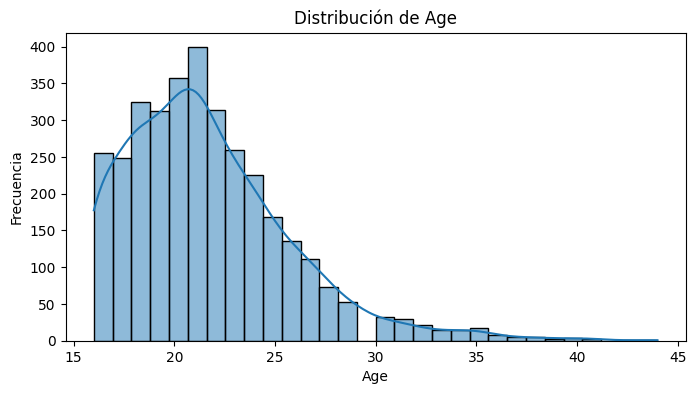

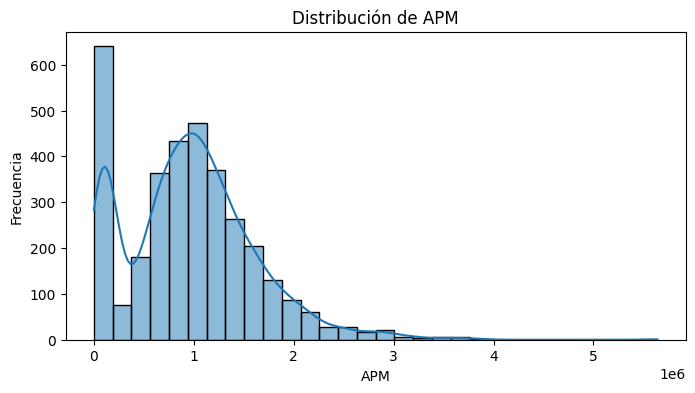

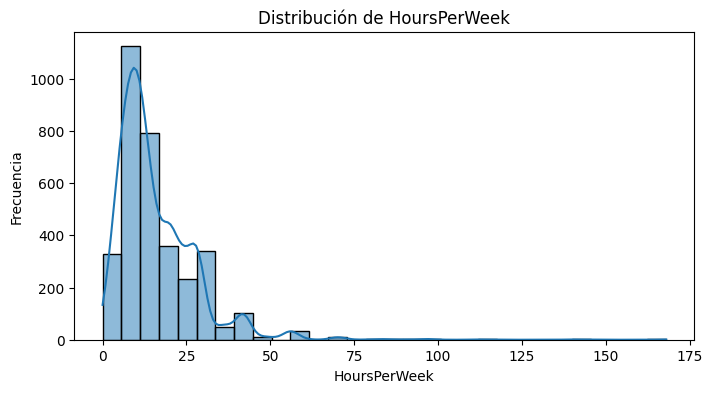

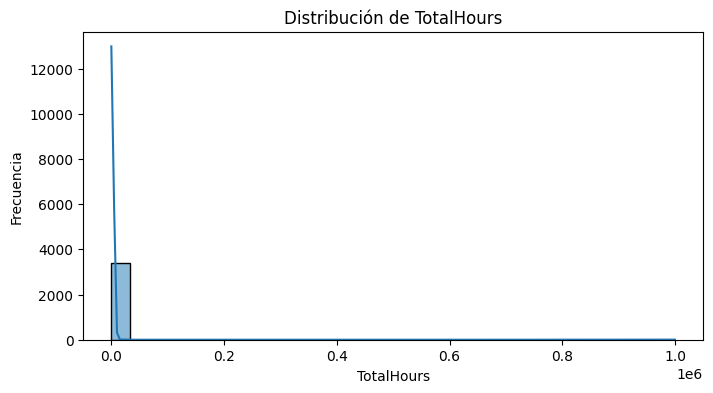

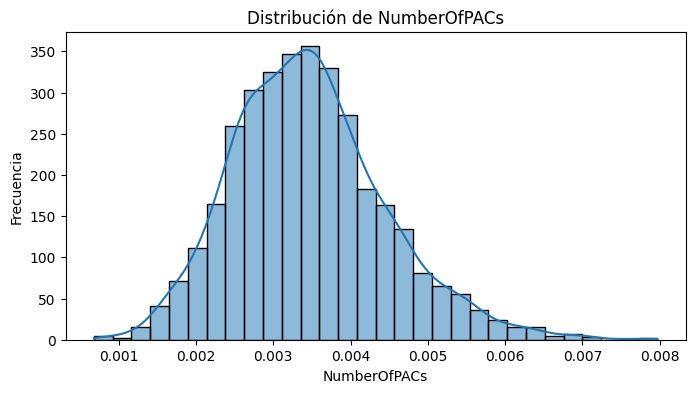

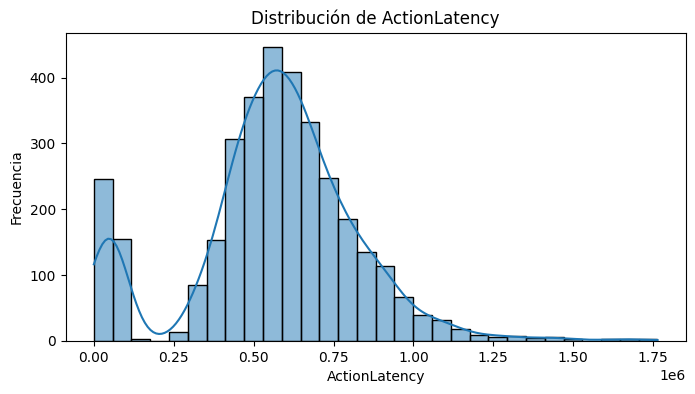

In [23]:
variables_numericas = ["Age", "APM", "HoursPerWeek", "TotalHours", "NumberOfPACs", "ActionLatency"]

for col in variables_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

Se graficaron histogramas para:
- ****APM**** mostró una **distribución asimétrica**, con muchos jugadores en rangos bajos y pocos con valores muy altos.
- ****HoursPerWeek**** y ****TotalHours**** también mostraron sesgo hacia la izquierda (valores altos menos frecuentes).
- ****ActionLatency**** tuvo una alta dispersión, señal de posibles outliers.

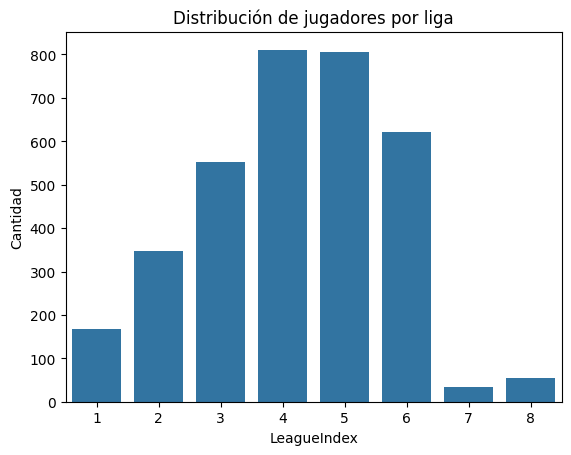

In [24]:
sns.countplot(x="LeagueIndex", data=df)
plt.title("Distribución de jugadores por liga")
plt.xlabel("LeagueIndex")
plt.ylabel("Cantidad")
plt.show()


- **LeagueIndex** (liga del jugador) mostró una distribución con mayor concentración en ligas medias (niveles 3 a 6).

### Correlaciones entre variables

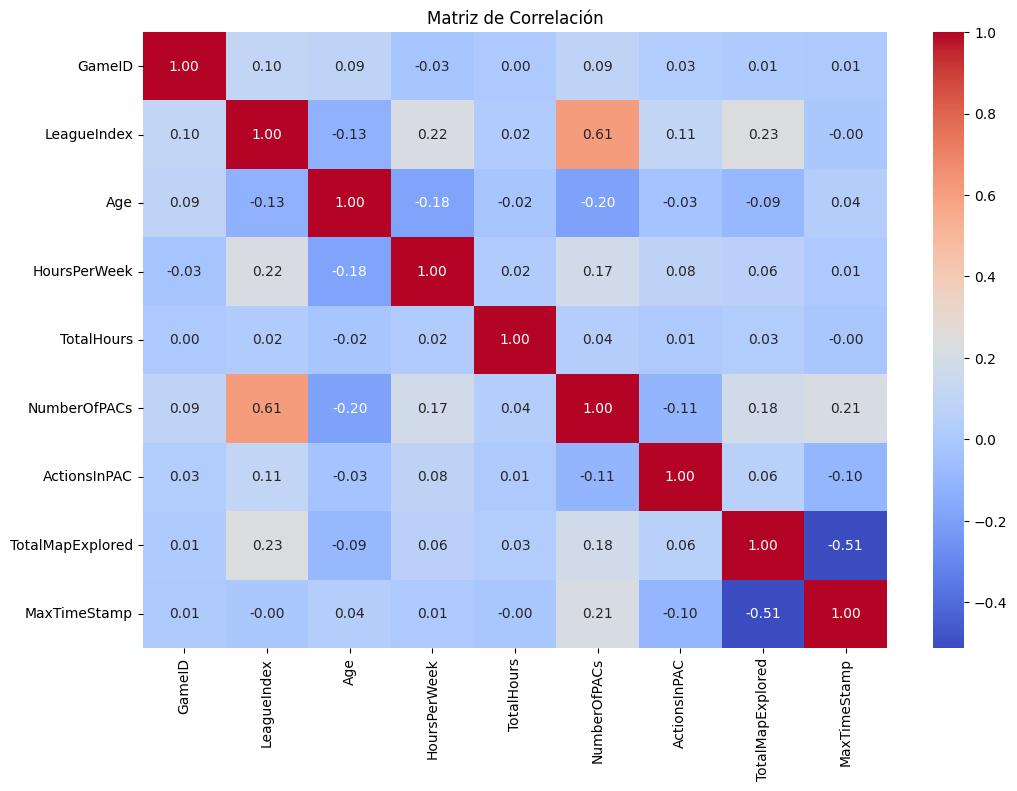

In [12]:
# Matriz de correlación
correlation = df.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

#### Age y LeagueIndex

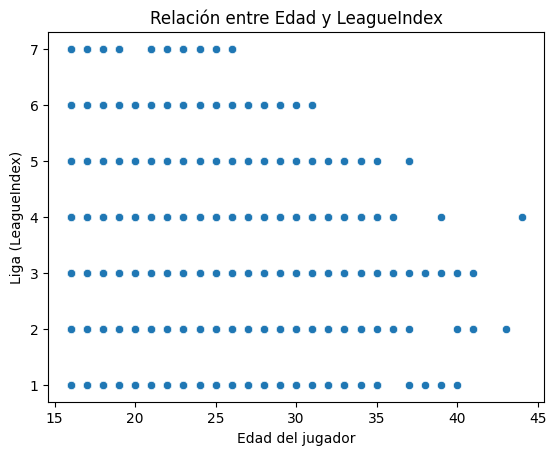

In [ ]:
sns.scatterplot(x="Age", y="LeagueIndex", data=df)
plt.title("Relación entre Edad y LeagueIndex")
plt.xlabel("Edad del jugador")
plt.ylabel("Liga (LeagueIndex)")
plt.show()


#### NumberOfPACs y LeagueIndex

Esto sugiere que a mayor cantidad de PACs (Perception-Action Cycles, ciclos de percepción-acción), mayor tiende a ser la liga del jugador. Es decir, los jugadores más avanzados interactúan con mayor frecuencia y precisión durante el juego.

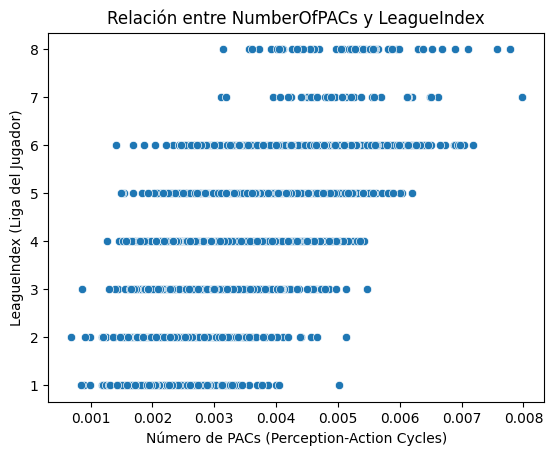

Correlación entre NumberOfPACs y LeagueIndex: 0.6122


In [28]:
# Gráfico de dispersión: NumberOfPACs vs LeagueIndex
sns.scatterplot(x="NumberOfPACs", y="LeagueIndex", data=df)
plt.title("Relación entre NumberOfPACs y LeagueIndex")
plt.xlabel("Número de PACs (Perception-Action Cycles)")
plt.ylabel("LeagueIndex (Liga del Jugador)")
plt.show()

# Correlación entre ambas variables
correlacion = df["NumberOfPACs"].corr(df["LeagueIndex"])
print(f"Correlación entre NumberOfPACs y LeagueIndex: {correlacion:.4f}")

#### TotalMapExplored y LeagueIndex

Correlación entre TotalMapExplored y LeagueIndex: 0.2330


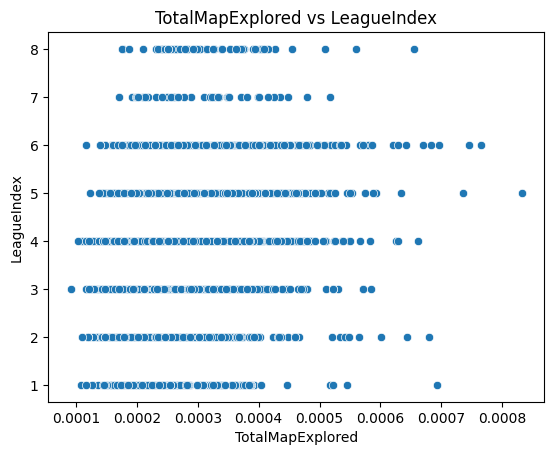

In [ ]:
var1 = "TotalMapExplored"
var2 = "LeagueIndex"

correlacion = df[var1].corr(df[var2])
print(f"Correlación entre {var1} y {var2}: {correlacion:.4f}")

# Y graficar:
sns.scatterplot(x=var1, y=var2, data=df)
plt.title(f"{var1} vs {var2}")
plt.show()


- Se generó una **matriz de correlación** para variables numéricas.
- Principales hallazgos:
  - ****NumberOfPACs**** correlaciona positivamente con ****LeagueIndex**** (**r ≈ 0.61**), indicando que jugadores con más ciclos de percepción-acción suelen estar en ligas más altas.
  - ****APM**** (acciones por minuto) también correlaciona con la liga (**r ≈ 0.44**), aunque en menor grado.
  - ****TotalMapExplored**** muestra una correlación más baja (**r ≈ 0.23**), pero aún positiva.

### Detección de outliers

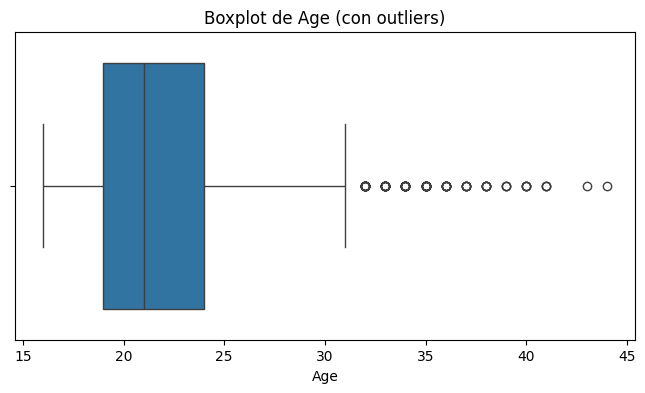

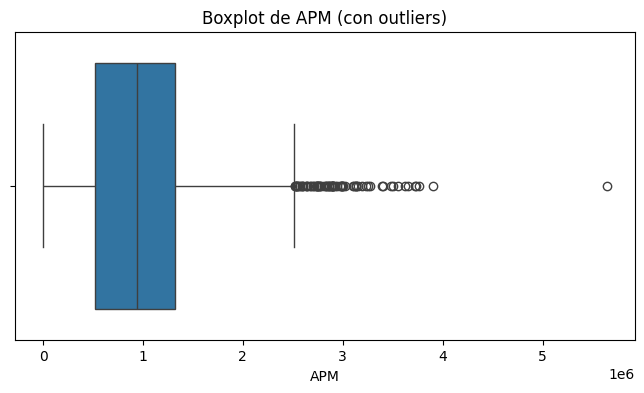

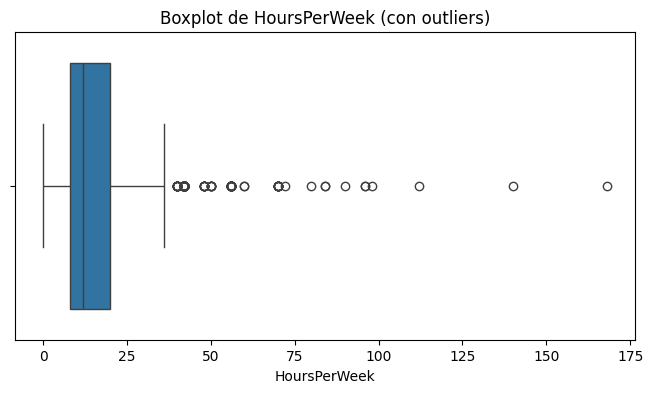

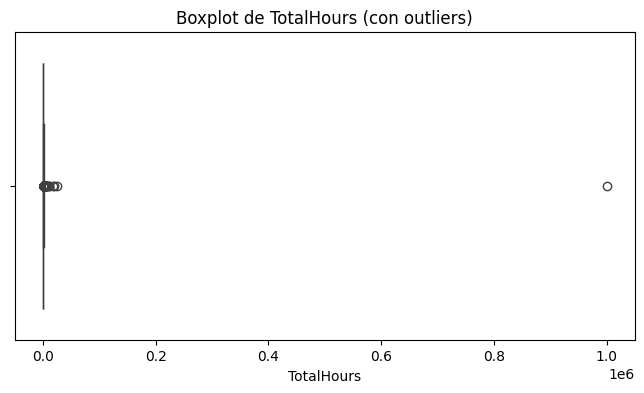

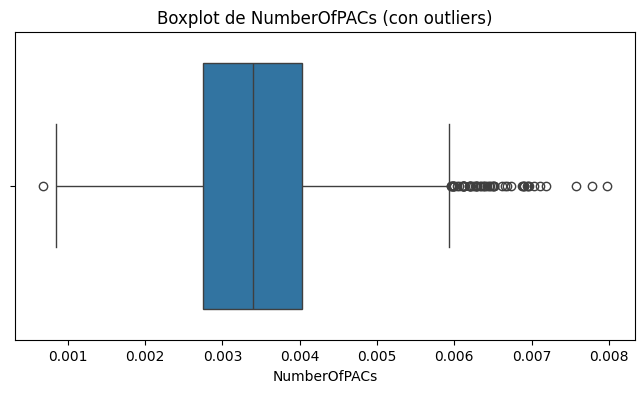

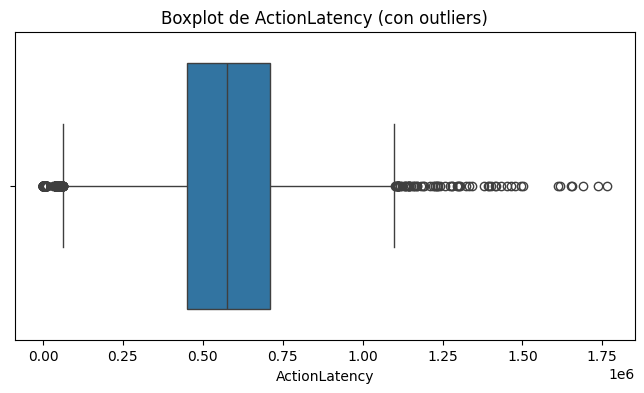

Resumen de outliers detectados:
{'Age': 98, 'APM': 72, 'HoursPerWeek': 171, 'TotalHours': 169, 'NumberOfPACs': 58, 'ActionLatency': 334}


In [15]:
# Lista de variables numéricas a analizar
variables_numericas = ["Age", "APM", "HoursPerWeek", "TotalHours", "NumberOfPACs", "ActionLatency"]

# Convertir todas a tipo numérico por seguridad
for col in variables_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Función para marcar outliers usando IQR
def marcar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (df[columna] < limite_inferior) | (df[columna] > limite_superior)

# Marcar outliers en columnas nuevas
for col in variables_numericas:
    df[f"outlier_{col}"] = marcar_outliers(df, col)

# Identificar variables que tienen al menos un outlier
variables_con_outliers = [col for col in variables_numericas if df[f"outlier_{col}"].sum() > 0]

# Graficar boxplots de variables con outliers
for col in variables_con_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col} (con outliers)")
    plt.xlabel(col)
    plt.show()

# Mostrar resumen de cantidad de outliers por variable
outlier_resumen = {col: int(df[f"outlier_{col}"].sum()) for col in variables_con_outliers}
print("Resumen de outliers detectados:")
print(outlier_resumen)

- Se aplicó el método IQR para variables como ****APM****, ****Age****, ****HoursPerWeek****, ****ActionLatency****, etc.
- Se detectaron valores atípicos significativos, especialmente en ****ActionLatency**** y ****HoursPerWeek****.
- Esto justificó un tratamiento posterior para eliminarlos o marcarlos, garantizando la calidad del análisis.


## Conclusiones Fase 2



- desarrollo de las conclusiones
## Conclusión – Fase 2: Comprensión de los Datos

En esta fase se realizó una exploración profunda del dataset ****starcraft_duoc.csv**** con el objetivo de comprender su estructura, calidad, contenido y potencial predictivo. A través del análisis estadístico, visualizaciones y correlaciones, se pudieron extraer diversos hallazgos importantes para el éxito del proyecto.

En primer lugar, se confirmó que el dataset cuenta con una estructura sólida: 3395 registros y 20 variables, incluyendo tanto métricas de comportamiento del jugador como indicadores de rendimiento. Se identificaron algunos problemas iniciales de formato, como columnas numéricas almacenadas como texto (****APM****) y la presencia de valores nulos en ****Age****, ****HoursPerWeek**** y ****TotalHours****. Estos fueron correctamente tratados más adelante.

La exploración de variables numéricas mostró distribuciones sesgadas y dispersas en algunas variables como ****APM****, ****TotalHours**** y ****ActionLatency****, lo cual permitió detectar patrones interesantes y anticipar la necesidad de limpiar outliers. El análisis de ****LeagueIndex****, variable categórica que representa el nivel del jugador, reveló que la mayoría se encuentra en ligas intermedias (niveles 3 a 5), con menor representación en los extremos.

Uno de los hallazgos más importantes fue la correlación positiva entre ****NumberOfPACs**** y ****LeagueIndex**** (r ≈ 0.61), lo que sugiere que los jugadores de ligas más altas interactúan con mayor frecuencia durante el juego. También se observó una correlación moderada entre ****APM**** y el nivel de liga, confirmando que la velocidad de acciones es un factor importante en el rendimiento competitivo.

Adicionalmente, se exploraron relaciones como ****Age**** vs ****LeagueIndex****, observando una leve correlación negativa que sugiere que los jugadores más jóvenes tienden a alcanzar ligas más altas, aunque sin una tendencia fuerte. Estos análisis permiten tener un mejor entendimiento del perfil del jugador competitivo.

Finalmente, se realizó una detección formal de outliers mediante el método IQR, confirmando la presencia de valores extremos en variables clave. Este paso fue fundamental para garantizar que el dataset no se vea distorsionado por registros atípicos y quede apto para un análisis confiable.

En resumen, esta fase permitió comprender a fondo el dataset, identificar variables relevantes, detectar problemas de calidad, y sentar las bases para una preparación de datos eficiente y un modelado exitoso. El conocimiento adquirido en esta etapa es crucial para orientar las decisiones futuras en el desarrollo del modelo predictivo.


## Fase 3: Data Preparation

###  Conversión de columnas

Durante la preparación de los datos, se detectó que algunas columnas numéricas estaban clasificadas como **object** (texto).  
Esto sucede cuando los valores contienen separadores de miles con punto (`.`) o símbolos que impiden que Python los interprete como números.  
Por ejemplo: ****"1.292.322"**** es tratado como texto y no como número.

Este problema es común en datasets provenientes de regiones donde el punto se usa como separador de miles en lugar de como separador decimal.

Para solucionarlo, se aplicó el siguiente procedimiento:
1. Identificar todas las columnas con tipo ****object****.
2. Eliminar los puntos (****.****) que funcionan como separador de miles.
3. Convertir cada columna a tipo numérico usando ****pd.to_numeric()**** con ****errors='coerce'****.

Esto transforma correctamente las columnas a ****int**** o ****float****, y convierte los valores no válidos en ****NaN**** sin detener el proceso.

Este proceso es la mejor opción porque:
- Permite recuperar correctamente valores numéricos mal tipados como texto.
- Deja el dataset listo para análisis estadísticos, visualizaciones y modelado.
- Evita errores al usar funciones como ****.mean()****, ****.corr()****, ****.describe()**** o al entrenar modelos.
- Es automática, segura y escalable a múltiples columnas.

En resumen:
Convertir texto numérico a valores numéricos reales garantiza la **calidad, precisión y funcionalidad del dataset** para cualquier tipo de análisis posterior.


In [8]:
# Revisar si hay columnas tipo object que realmente contienen números
columnas_object = df.select_dtypes(include="object").columns

# Intentar convertirlas a numérico si es posible
for col in columnas_object:
    try:
        # Quitar puntos (separador de miles) y convertir a número
        df[col] = df[col].str.replace(".", "", regex=False)
        df[col] = pd.to_numeric(df[col], errors="coerce")
    except:
        # Si falla, dejar la columna como está (probablemente sea texto real)
        pass

# Verifica qué tipos de datos tiene ahora
print(df.dtypes)

GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                     int64
SelectByHotkeys       float64
AssignToHotkeys       float64
MinimapAttacks        float64
MinimapRightClicks    float64
NumberOfPACs          float64
GapBetweenPACs          int64
ActionLatency           int64
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade           float64
UniqueUnitsMade       float64
ComplexUnitsMade      float64
ComplexAbilityUsed    float64
MaxTimeStamp            int64
dtype: object


### Tratamiento de Nulos

Durante la Fase 3 de CRISP-DM (Preparación de los Datos), se detectaron valores nulos en tres columnas del dataset: **Age, HoursPerWeek y TotalHours**, con aproximadamente un 1.6% de registros faltantes en cada una.

Dado que el porcentaje de datos nulos era bajo, **se decidió rellenar esos valores usando la mediana de cada variable**. Esta técnica se eligió por ser una solución robusta y confiable, ya que la mediana no se ve afectada por valores atípicos (outliers), a diferencia de la media.

Además, rellenar en lugar de eliminar permite conservar todos los registros del dataset, lo que es especialmente útil cuando se desea mantener la mayor cantidad de información posible para análisis o modelado.

En resumen, imputar con la mediana fue la mejor decisión porque:

- Se evita la pérdida de datos.

- Se reduce el sesgo causado por valores extremos.

- Se mejora la calidad del dataset de forma simple y efectiva.

In [21]:
# Asegurar que las columnas con nulos sean numéricas
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["HoursPerWeek"] = pd.to_numeric(df["HoursPerWeek"], errors="coerce")
df["TotalHours"] = pd.to_numeric(df["TotalHours"], errors="coerce")

# Rellenar los nulos con la mediana de cada columna
df["Age"] = df["Age"].fillna(df["Age"].median())
df["HoursPerWeek"] = df["HoursPerWeek"].fillna(df["HoursPerWeek"].median())
df["TotalHours"] = df["TotalHours"].fillna(df["TotalHours"].median())

# Verificar que ya no haya nulos
print(df[["Age", "HoursPerWeek", "TotalHours"]].isnull().sum())

Age             0
HoursPerWeek    0
TotalHours      0
dtype: int64


### Tratmiento de outliers 

Durante la fase de **Preparación de los Datos (Fase 3 - CRISP-DM)** se identificaron valores atípicos (outliers) en varias variables numéricas utilizando el método **IQR (rango intercuartílico)**.

Se decidió **eliminar las filas que contenían al menos un outlier** en las siguientes variables:
- ****Age****
- ****APM****
- ****HoursPerWeek****
- ****TotalHours****
- ****NumberOfPACs****
- ****ActionLatency****

¿Por qué se eliminaron los outliers?

1. **Mejoran la calidad del dataset**  
   Los valores extremos distorsionan estadísticas como la media, desviación estándar y correlaciones.

2. **Evita sesgos en el análisis**  
   Permite representar de mejor forma el comportamiento típico de los jugadores.

3. **Impacto controlado**  
   Se eliminaron 763 registros de un total de 3395 (22.5%), dejando 2632 datos representativos.

4. **Facilita el modelado**  
   Muchos algoritmos de machine learning son sensibles a valores extremos, como regresión o KNN.

Este proceso es la mejor opción porque:

- Los valores eliminados eran **extremos no representativos**, como horas de juego exageradas o APM desproporcionados.
- Eliminar en lugar de transformar evita distorsionar la estructura del dato.
- El resultado es un dataset **limpio, balanceado y listo para análisis o predicción.**



In [16]:
# Lista de columnas booleanas que indican outliers
outlier_cols = [f"outlier_{col}" for col in variables_numericas]

# Eliminar filas que tienen al menos un outlier en cualquiera de las variables
df_limpio = df[~df[outlier_cols].any(axis=1)].copy()

# Mostrar resumen
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar outliers: {df_limpio.shape[0]}")


Filas originales: 3395
Filas después de eliminar outliers: 2632


## Fase 4: Modeling

### Aprendizaje Supervisado - Regresión

### Aprendizaje Supervisado - Clasificación



## Fase 5: Evaluation

### Aprendizaje Supervisado - Regresión

COMPARACION FINAL




### Aprendizaje Supervisado - Clasificacion



COMPARACION FINAL






CONCLUSION





### Aprendizaje NO Supervisado - Clustering



## Fase 6: Deployment